# Joint embedding comparison using simulated data
1. Generate simulated data
2. Run comparing approaches
3. Visualize embeddings

In [11]:
import sys

sys.path.append('../../functions')
import simulation.assay_simulator as simulation
from CLIPn import CLIPn
from MLP.model import MLP
from functions.helper import *

## Generate simulation datasets
Dataset: 8

Labels: 10 categories in total - each dataset can only profile random 5 of them

Sample: ~1,000 samples from 5 observed categories in each dataset. 

Feature degradation: noise and feature dropouts

In [12]:
n_datasets = 8

data = simulation.cell_simulator(n_sample=2000, n_cluster=10, n_cellline=n_datasets,
                                 sigma_max=1, sigma_min=0.1,
                                 rho_max=0.8, rho_min=0.1,
                                 cluster_observe_ratio=0.5, random_seed=2024)
X = dict()
y = dict()
for i in range(n_datasets):
    X[i] = data["dataset_" + str(i) + "_feature"]
    y[i] = data["dataset_" + str(i) + "_label"]

### Visualization of generated datasets
Feature dimension, sample sizes and feature degradation levels vary. 

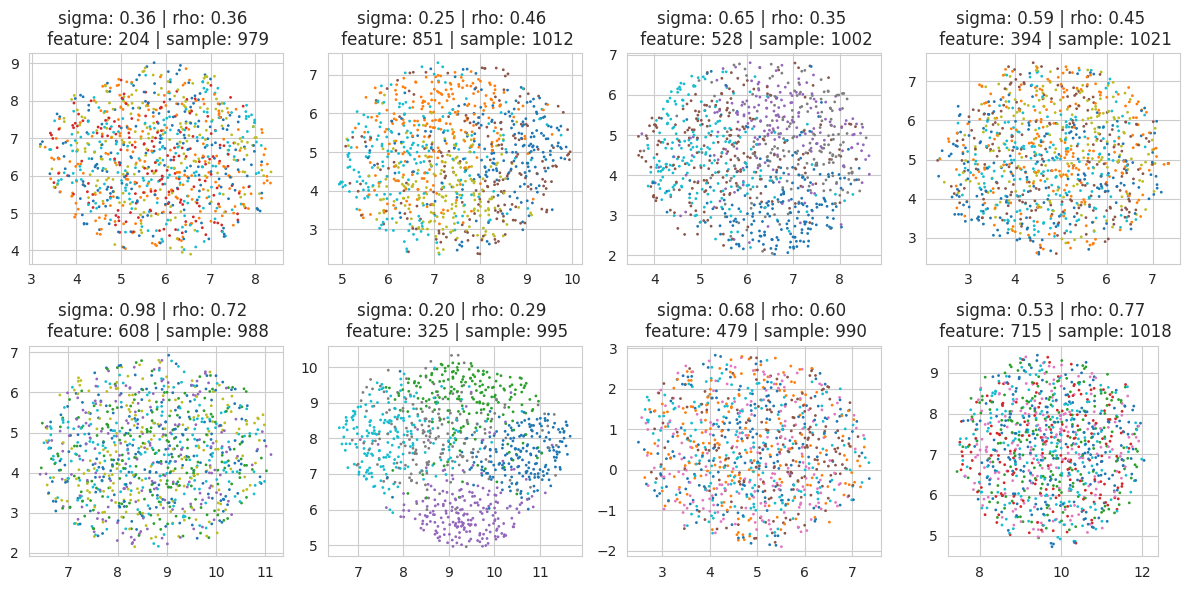

In [13]:
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
k = 0  # figure count

for i in range(2):
    for j in range(4):
        feature = data["dataset_" + str(k) + "_feature"]
        label = data["dataset_" + str(k) + "_label"]
        embed = umap.UMAP().fit_transform(feature)

        sigma = data["dataset_" + str(k) + "_noise"]
        rho = data["dataset_" + str(k) + "_dropout"]

        axs[i, j].scatter(embed[:, 0], embed[:, 1], c=label, cmap='tab10', s=1)
        axs[i, j].set_title(
            'sigma: {:.2f} | rho: {:.2f} \n feature: {} | sample: {}'.format(sigma, rho, feature.shape[1],
                                                                             feature.shape[0]))
        plt.axis('square')
        plt.tight_layout()
        k += 1
plt.show()

# Run integration approaches
1. CCA
2. StabMap
3. MLP
4. CLIP<sup>n</sup>

In [14]:
latent_dim = 10

### CCA

Running CCA ...


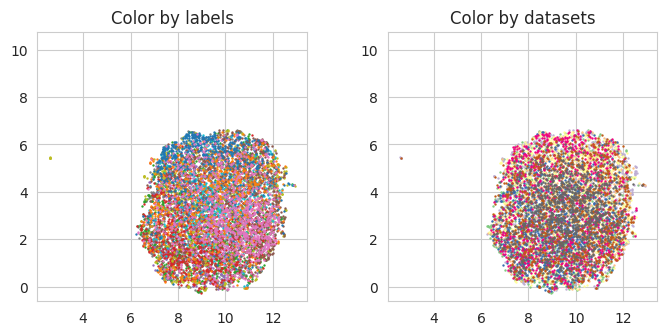

In [15]:
cca = multi_CCA(X, y, latent_dim=latent_dim)
z_cca = cca.fit_transform(X, y)
umap_scatter(z_cca, y)

### StabMAP

Running Stabmap ...


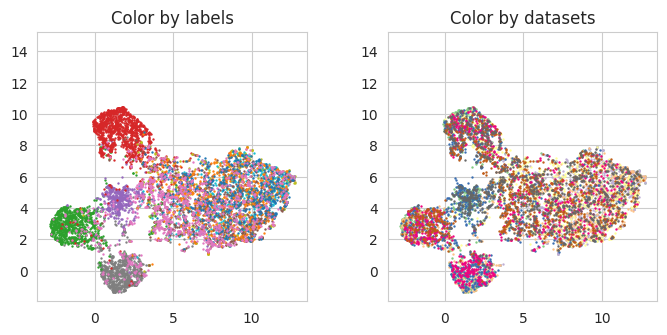

In [16]:
stab = multi_stabmap(X, y, latent_dim=latent_dim)
z_stab = stab.fit_transform(X, y)
umap_scatter(z_stab, y)

### MLP

Running MLP ...


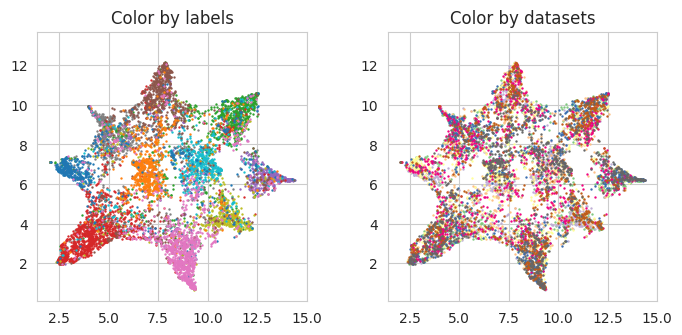

In [17]:
max_dim = 0

for i in X.keys():
    max_dim = max(max_dim, X[i].shape[1])

model = MLP(max_dim, 10)
model.fit(X, y)
z_mlp = model.embedding(X)
umap_scatter(z_mlp, y)

### CLIP<sup>n</sup>

Running CLIPn ...


  0%|          | 0/100 [00:00<?, ?it/s]

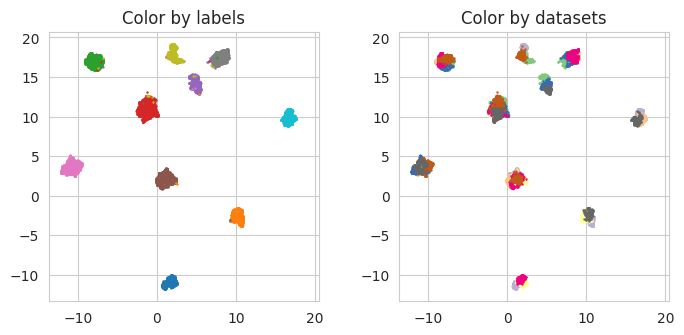

In [18]:
clpn = CLIPn(X, y, latent_dim=latent_dim)
loss = clpn.fit(X, y)
z_clipn = clpn.predict(X)
umap_scatter(z_clipn, y)

In [19]:
import pickle

z = dict()
z['CCA'] = z_cca
z['StabMAP'] = z_stab
z['MLP'] = z_mlp
z['CLIPn'] = z_clipn
with open('./results/z.pkl', 'wb') as f:
    pickle.dump(z, f)